In [ ]:
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import random

# fix random seed to get reproduceable results
random.seed(667)

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

iris = datasets.load_iris()

data = np.zeros((len(iris.target), 5))


data[:,0:4] = iris.data[:, 0:4]

for i in range(len(iris.target)):
    data[i][4] = iris.target[i]

np.random.shuffle(data)

X = data[:, 0:4]  # take all 4 features (Sepal Length, Sepal Width, Petal Length and Petal Width)
Y = data[:, 4]

# normalize the dataset
scaler = MinMaxScaler((-0.5, 0.5))
X = scaler.fit_transform(X)

### split onto train and test set (holdout cross validation)
train_ratio = 0.9

len_dataset = len(X)

len_train = int(train_ratio * len_dataset)
len_test = len_dataset - len_train

train_x = np.zeros((len_train,4))
train_y = np.zeros((len_train,3))

test_x = np.zeros((len_test,4))
test_y = np.zeros((len_test,3))




# load train and test input and response rows (you can do train/test splitting in model.fit() as well)
# but doing it here gives you an explicit train and test set of which you can use to verify classification accruacry later

# the categorical target is one-hot encoded
for i in range(len_train):
    train_x[i] = X[i]
    if(Y[i] == 0):
        train_y[i] = np.array([1, 0, 0]) - 0.5
    elif(Y[i] == 1):
        train_y[i] = np.array([0, 1, 0] ) - 0.5
    else:
        train_y[i] = np.array([0, 0, 1] ) - 0.5
        
    
for i in range(len_test):
    test_x[i] = X[i+len_train]
    if(Y[i+len_train] == 0):
        test_y[i] = np.array([1, 0, 0])  - 0.5
    elif(Y[i+len_train] == 1):
        test_y[i] = np.array([0, 1, 0])  - 0.5
    else:
        test_y[i] = np.array([0, 0, 1] ) - 0.5
    
for i in range(5):
    print("Train x: " + str(train_x[i]) + " Train y: " + str(train_y[i]))
    
print()
for i in range(5):
    print("Test x: " + str(test_x[i]) + " Test y: " + str(test_y[i]))

Using TensorFlow backend.


NameError: name 'iris' is not defined

Train on 135 samples, validate on 15 samples
Epoch 1/200


  5/135 [>.............................] - ETA: 10s - loss: 0.3328 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.3432 - acc: 0.2444 - val_loss: 0.3170 - val_acc: 0.1333


Epoch 2/200
  5/135 [>.............................] - ETA: 0s - loss: 0.3499 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.2774 - acc: 0.3704 - val_loss: 0.2553 - val_acc: 0.2667


Epoch 3/200
  5/135 [>.............................] - ETA: 0s - loss: 0.3016 - acc: 0.2000

135/135 [==============================] - 0s - loss: 0.2270 - acc: 0.4889 - val_loss: 0.2082 - val_acc: 0.5333


Epoch 4/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1780 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1881 - acc: 0.6074 - val_loss: 0.1721 - val_acc: 0.7333


Epoch 5/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1784 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.1572 - acc: 0.7481 - val_loss: 0.1434 - val_acc: 0.8000


Epoch 6/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1051 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1347 - acc: 0.8222 - val_loss: 0.1238 - val_acc: 0.8667


Epoch 7/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1535 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1196 - acc: 0.8593 - val_loss: 0.1111 - val_acc: 0.8667


Epoch 8/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1293 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1109 - acc: 0.8519 - val_loss: 0.1036 - val_acc: 0.8667


Epoch 9/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1339 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.1052 - acc: 0.8519 - val_loss: 0.0988 - val_acc: 0.8667


Epoch 10/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0917 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1021 - acc: 0.8593 - val_loss: 0.0964 - val_acc: 0.8667


Epoch 11/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0617 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.1003 - acc: 0.8519 - val_loss: 0.0948 - val_acc: 0.8667


Epoch 12/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0727 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0992 - acc: 0.8667 - val_loss: 0.0936 - val_acc: 0.8667


Epoch 13/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0864 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0984 - acc: 0.8741 - val_loss: 0.0929 - val_acc: 0.8667


Epoch 14/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0651 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0978 - acc: 0.8593 - val_loss: 0.0923 - val_acc: 0.8667


Epoch 15/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0954 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0973 - acc: 0.8593 - val_loss: 0.0917 - val_acc: 0.8667


Epoch 16/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1003 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0968 - acc: 0.8667 - val_loss: 0.0913 - val_acc: 0.8667


Epoch 17/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0651 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0964 - acc: 0.8667 - val_loss: 0.0908 - val_acc: 0.8667


Epoch 18/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1224 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0960 - acc: 0.8667 - val_loss: 0.0903 - val_acc: 0.8667


Epoch 19/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1922 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0956 - acc: 0.8741 - val_loss: 0.0899 - val_acc: 0.8667


Epoch 20/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0465 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0953 - acc: 0.8667 - val_loss: 0.0893 - val_acc: 0.8667


Epoch 21/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0393 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0949 - acc: 0.8444 - val_loss: 0.0887 - val_acc: 0.8667


Epoch 22/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0789 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0947 - acc: 0.8593 - val_loss: 0.0882 - val_acc: 0.8667


Epoch 23/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0222 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0944 - acc: 0.8593 - val_loss: 0.0879 - val_acc: 0.8667


Epoch 24/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0652 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0941 - acc: 0.8593 - val_loss: 0.0874 - val_acc: 0.8667


Epoch 25/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1250 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0940 - acc: 0.8444 - val_loss: 0.0869 - val_acc: 0.8667


Epoch 26/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0449 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0935 - acc: 0.8593 - val_loss: 0.0867 - val_acc: 0.8667


Epoch 27/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1095 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0934 - acc: 0.8444 - val_loss: 0.0863 - val_acc: 0.8667


Epoch 28/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1197 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0931 - acc: 0.8593 - val_loss: 0.0859 - val_acc: 0.8667


Epoch 29/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0897 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0930 - acc: 0.8667 - val_loss: 0.0855 - val_acc: 0.8667


Epoch 30/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0486 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0928 - acc: 0.8667 - val_loss: 0.0852 - val_acc: 0.8667


Epoch 31/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0706 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0924 - acc: 0.8519 - val_loss: 0.0850 - val_acc: 0.8667


Epoch 32/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0905 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0924 - acc: 0.8741 - val_loss: 0.0845 - val_acc: 0.8667


Epoch 33/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0670 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0922 - acc: 0.8741 - val_loss: 0.0842 - val_acc: 0.8667


Epoch 34/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0409 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0919 - acc: 0.8667 - val_loss: 0.0839 - val_acc: 0.8667


Epoch 35/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0800 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0918 - acc: 0.8741 - val_loss: 0.0836 - val_acc: 0.8667


Epoch 36/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0648 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0916 - acc: 0.8741 - val_loss: 0.0832 - val_acc: 0.8667


Epoch 37/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1239 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0915 - acc: 0.8741 - val_loss: 0.0829 - val_acc: 0.8667


Epoch 38/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0773 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0913 - acc: 0.8667 - val_loss: 0.0826 - val_acc: 0.8667


Epoch 39/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0561 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0913 - acc: 0.8741 - val_loss: 0.0823 - val_acc: 0.8667


Epoch 40/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1047 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0910 - acc: 0.8667 - val_loss: 0.0820 - val_acc: 0.8667


Epoch 41/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0989 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0909 - acc: 0.8667 - val_loss: 0.0818 - val_acc: 0.8667


Epoch 42/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1178 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0905 - acc: 0.8667 - val_loss: 0.0816 - val_acc: 0.8667


Epoch 43/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0855 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0905 - acc: 0.8741 - val_loss: 0.0811 - val_acc: 0.8667


Epoch 44/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0502 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0903 - acc: 0.8741 - val_loss: 0.0808 - val_acc: 0.8667


Epoch 45/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1205 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0904 - acc: 0.8741 - val_loss: 0.0806 - val_acc: 0.8667


Epoch 46/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0703 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0900 - acc: 0.8741 - val_loss: 0.0804 - val_acc: 0.8667

Epoch 47/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1457 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0900 - acc: 0.8667 - val_loss: 0.0802 - val_acc: 0.8667


Epoch 48/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0453 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0899 - acc: 0.8741 - val_loss: 0.0800 - val_acc: 0.8667


Epoch 49/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0780 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0896 - acc: 0.8741 - val_loss: 0.0798 - val_acc: 0.8667


Epoch 50/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1170 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0897 - acc: 0.8667 - val_loss: 0.0795 - val_acc: 0.8667


Epoch 51/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0766 - acc: 1.0000

100/135 [=====================>........] - ETA: 0s - loss: 0.0793 - acc: 0.9100

135/135 [==============================] - 0s - loss: 0.0896 - acc: 0.8815 - val_loss: 0.0793 - val_acc: 0.8667


Epoch 52/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1275 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0893 - acc: 0.8815 - val_loss: 0.0790 - val_acc: 0.8667


Epoch 53/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0965 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0893 - acc: 0.8815 - val_loss: 0.0788 - val_acc: 0.8667


Epoch 54/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1321 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0892 - acc: 0.8741 - val_loss: 0.0786 - val_acc: 0.8667


Epoch 55/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1657 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0891 - acc: 0.8815 - val_loss: 0.0783 - val_acc: 0.8667


Epoch 56/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1010 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0888 - acc: 0.8815 - val_loss: 0.0781 - val_acc: 0.8667


Epoch 57/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1365 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0888 - acc: 0.8741 - val_loss: 0.0780 - val_acc: 0.8667


Epoch 58/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1242 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0888 - acc: 0.8815 - val_loss: 0.0778 - val_acc: 0.8667


Epoch 59/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0997 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0884 - acc: 0.8815 - val_loss: 0.0776 - val_acc: 0.8667


Epoch 60/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0133 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0886 - acc: 0.8815 - val_loss: 0.0773 - val_acc: 0.8667


Epoch 61/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1001 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0882 - acc: 0.8741 - val_loss: 0.0771 - val_acc: 0.8667


Epoch 62/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0874 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0883 - acc: 0.8815 - val_loss: 0.0770 - val_acc: 0.8667


Epoch 63/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0342 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0883 - acc: 0.8741 - val_loss: 0.0768 - val_acc: 0.8667


Epoch 64/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0969 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0881 - acc: 0.8815 - val_loss: 0.0767 - val_acc: 0.8667


Epoch 65/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1541 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0880 - acc: 0.8667 - val_loss: 0.0766 - val_acc: 0.8667


Epoch 66/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0699 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0879 - acc: 0.8815 - val_loss: 0.0765 - val_acc: 0.8667


Epoch 67/200
  5/135 [>.............................] - ETA: 0s - loss: 0.2155 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0879 - acc: 0.8741 - val_loss: 0.0763 - val_acc: 0.8667


Epoch 68/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0708 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0876 - acc: 0.8889 - val_loss: 0.0760 - val_acc: 0.8667


Epoch 69/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1120 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0875 - acc: 0.8889 - val_loss: 0.0759 - val_acc: 0.8667


Epoch 70/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1375 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0875 - acc: 0.8889 - val_loss: 0.0757 - val_acc: 0.8667


Epoch 71/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0751 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0874 - acc: 0.8889 - val_loss: 0.0755 - val_acc: 0.8667


Epoch 72/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0433 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0872 - acc: 0.8741 - val_loss: 0.0753 - val_acc: 0.8667


Epoch 73/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1168 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0872 - acc: 0.8815 - val_loss: 0.0751 - val_acc: 0.8667


Epoch 74/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1670 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0870 - acc: 0.8889 - val_loss: 0.0750 - val_acc: 0.8667


Epoch 75/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0542 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0870 - acc: 0.8593 - val_loss: 0.0750 - val_acc: 0.8667


Epoch 76/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0766 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0869 - acc: 0.8889 - val_loss: 0.0748 - val_acc: 0.8667


Epoch 77/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1480 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0867 - acc: 0.8741 - val_loss: 0.0748 - val_acc: 0.8667


Epoch 78/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0935 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0868 - acc: 0.8815 - val_loss: 0.0746 - val_acc: 0.8667


Epoch 79/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0267 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0868 - acc: 0.8815 - val_loss: 0.0744 - val_acc: 0.8667


Epoch 80/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1692 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0866 - acc: 0.8815 - val_loss: 0.0743 - val_acc: 0.8667


Epoch 81/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0587 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0863 - acc: 0.8815 - val_loss: 0.0742 - val_acc: 0.8667


Epoch 82/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0996 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0865 - acc: 0.8889 - val_loss: 0.0740 - val_acc: 0.8667


Epoch 83/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0911 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0863 - acc: 0.8741 - val_loss: 0.0740 - val_acc: 0.8667


Epoch 84/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1342 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0863 - acc: 0.8889 - val_loss: 0.0738 - val_acc: 0.8667


Epoch 85/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1195 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0860 - acc: 0.8741 - val_loss: 0.0736 - val_acc: 0.8667


Epoch 86/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1565 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0860 - acc: 0.8815 - val_loss: 0.0735 - val_acc: 0.8667


Epoch 87/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0637 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0859 - acc: 0.8889 - val_loss: 0.0733 - val_acc: 0.8667


Epoch 88/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0814 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0857 - acc: 0.8815 - val_loss: 0.0732 - val_acc: 0.8667


Epoch 89/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0774 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0857 - acc: 0.8741 - val_loss: 0.0731 - val_acc: 0.8667


Epoch 90/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0740 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0858 - acc: 0.8815 - val_loss: 0.0730 - val_acc: 0.8667


Epoch 91/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0649 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0855 - acc: 0.8889 - val_loss: 0.0729 - val_acc: 0.8667


Epoch 92/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1850 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.0854 - acc: 0.8741 - val_loss: 0.0729 - val_acc: 0.8667


Epoch 93/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1006 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8889 - val_loss: 0.0727 - val_acc: 0.8667


Epoch 94/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0274 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8815 - val_loss: 0.0725 - val_acc: 0.8667


Epoch 95/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0710 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0853 - acc: 0.8815 - val_loss: 0.0724 - val_acc: 0.8667


Epoch 96/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0406 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0850 - acc: 0.8667 - val_loss: 0.0724 - val_acc: 0.8667


Epoch 97/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0792 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0849 - acc: 0.8667 - val_loss: 0.0724 - val_acc: 0.8667


Epoch 98/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0565 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0848 - acc: 0.8741 - val_loss: 0.0722 - val_acc: 0.8667


Epoch 99/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1225 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0847 - acc: 0.8815 - val_loss: 0.0721 - val_acc: 0.8667


Epoch 100/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0676 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0847 - acc: 0.8815 - val_loss: 0.0720 - val_acc: 0.8667

Epoch 101/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0405 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0844 - acc: 0.8815 - val_loss: 0.0719 - val_acc: 0.8667


Epoch 102/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0135 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0844 - acc: 0.8889 - val_loss: 0.0717 - val_acc: 0.8667


Epoch 103/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0404 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0845 - acc: 0.8741 - val_loss: 0.0716 - val_acc: 0.8667


Epoch 104/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1380 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0842 - acc: 0.8667 - val_loss: 0.0717 - val_acc: 0.8000


Epoch 105/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1079 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0843 - acc: 0.8889 - val_loss: 0.0715 - val_acc: 0.8667


Epoch 106/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0392 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0840 - acc: 0.8741 - val_loss: 0.0714 - val_acc: 0.8667


Epoch 107/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1500 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0838 - acc: 0.8963 - val_loss: 0.0713 - val_acc: 0.8667


Epoch 108/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0792 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0837 - acc: 0.8741 - val_loss: 0.0711 - val_acc: 0.8667


Epoch 109/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1239 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0837 - acc: 0.8741 - val_loss: 0.0710 - val_acc: 0.8667


Epoch 110/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0853 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0836 - acc: 0.8667 - val_loss: 0.0710 - val_acc: 0.8667


Epoch 111/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0092 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0835 - acc: 0.8741 - val_loss: 0.0709 - val_acc: 0.8000

Epoch 112/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0423 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0833 - acc: 0.8741 - val_loss: 0.0708 - val_acc: 0.8000

Epoch 113/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1039 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0834 - acc: 0.8889 - val_loss: 0.0707 - val_acc: 0.8000


Epoch 114/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1005 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0830 - acc: 0.8741 - val_loss: 0.0705 - val_acc: 0.8667


Epoch 115/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0598 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0830 - acc: 0.8741 - val_loss: 0.0704 - val_acc: 0.8000


Epoch 116/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0182 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0829 - acc: 0.8667 - val_loss: 0.0703 - val_acc: 0.8000


Epoch 117/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1621 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0827 - acc: 0.8741 - val_loss: 0.0702 - val_acc: 0.8000


Epoch 118/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1097 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0827 - acc: 0.8667 - val_loss: 0.0701 - val_acc: 0.8000


Epoch 119/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0768 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0825 - acc: 0.8741 - val_loss: 0.0701 - val_acc: 0.8000


Epoch 120/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0661 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0823 - acc: 0.8741 - val_loss: 0.0700 - val_acc: 0.8000


Epoch 121/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0485 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0821 - acc: 0.8815 - val_loss: 0.0698 - val_acc: 0.8000


Epoch 122/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0715 - acc: 0.8000



135/135 [==============================] - 0s - loss: 0.0822 - acc: 0.8815 - val_loss: 0.0698 - val_acc: 0.8000


Epoch 123/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0659 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0820 - acc: 0.8741 - val_loss: 0.0697 - val_acc: 0.8000

Epoch 124/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1228 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0818 - acc: 0.8741 - val_loss: 0.0696 - val_acc: 0.8000


Epoch 125/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0580 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0815 - acc: 0.8889 - val_loss: 0.0695 - val_acc: 0.8000


Epoch 126/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0120 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0815 - acc: 0.8741 - val_loss: 0.0694 - val_acc: 0.8000


Epoch 127/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0959 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0813 - acc: 0.8741 - val_loss: 0.0693 - val_acc: 0.8000


Epoch 128/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0411 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0811 - acc: 0.8815 - val_loss: 0.0693 - val_acc: 0.8000


Epoch 129/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0247 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0810 - acc: 0.8815 - val_loss: 0.0692 - val_acc: 0.8000


Epoch 130/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0381 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0808 - acc: 0.8815 - val_loss: 0.0690 - val_acc: 0.8000


Epoch 131/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0521 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0807 - acc: 0.8889 - val_loss: 0.0690 - val_acc: 0.8000


Epoch 132/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0874 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0806 - acc: 0.8815 - val_loss: 0.0688 - val_acc: 0.8000


Epoch 133/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0999 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0803 - acc: 0.8815 - val_loss: 0.0688 - val_acc: 0.8000


Epoch 134/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0239 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0802 - acc: 0.8815 - val_loss: 0.0687 - val_acc: 0.8000


Epoch 135/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0408 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0799 - acc: 0.8963 - val_loss: 0.0684 - val_acc: 0.8000


Epoch 136/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1142 - acc: 0.6000



135/135 [==============================] - 0s - loss: 0.0798 - acc: 0.8815 - val_loss: 0.0683 - val_acc: 0.8000


Epoch 137/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0380 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0796 - acc: 0.8815 - val_loss: 0.0683 - val_acc: 0.8000


Epoch 138/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0684 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0793 - acc: 0.8889 - val_loss: 0.0682 - val_acc: 0.8000


Epoch 139/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0525 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0791 - acc: 0.8815 - val_loss: 0.0680 - val_acc: 0.8000


Epoch 140/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0357 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0790 - acc: 0.8889 - val_loss: 0.0679 - val_acc: 0.8000


Epoch 141/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0873 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0786 - acc: 0.8889 - val_loss: 0.0677 - val_acc: 0.8000


Epoch 142/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0517 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0784 - acc: 0.8889 - val_loss: 0.0675 - val_acc: 0.8000


Epoch 143/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1524 - acc: 0.4000

135/135 [==============================] - 0s - loss: 0.0784 - acc: 0.8815 - val_loss: 0.0674 - val_acc: 0.8000


Epoch 144/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1086 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0781 - acc: 0.8889 - val_loss: 0.0673 - val_acc: 0.8000


Epoch 145/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0665 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0778 - acc: 0.8815 - val_loss: 0.0672 - val_acc: 0.8000


Epoch 146/200


  5/135 [>.............................] - ETA: 0s - loss: 0.0836 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0777 - acc: 0.8889 - val_loss: 0.0670 - val_acc: 0.8000


Epoch 147/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0491 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0774 - acc: 0.8889 - val_loss: 0.0668 - val_acc: 0.8000


Epoch 148/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1086 - acc: 1.0000



135/135 [==============================] - 0s - loss: 0.0769 - acc: 0.8815 - val_loss: 0.0670 - val_acc: 0.8000


Epoch 149/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1293 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0769 - acc: 0.8889 - val_loss: 0.0667 - val_acc: 0.8000


Epoch 150/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1229 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0766 - acc: 0.8815 - val_loss: 0.0666 - val_acc: 0.8000


Epoch 151/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0728 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0764 - acc: 0.8889 - val_loss: 0.0664 - val_acc: 0.8000


Epoch 152/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0516 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0761 - acc: 0.8963 - val_loss: 0.0662 - val_acc: 0.8000


Epoch 153/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0684 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0759 - acc: 0.8889 - val_loss: 0.0661 - val_acc: 0.8000


Epoch 154/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0265 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0756 - acc: 0.8889 - val_loss: 0.0661 - val_acc: 0.8000


Epoch 155/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0272 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0755 - acc: 0.9185 - val_loss: 0.0659 - val_acc: 0.8000


Epoch 156/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1070 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0750 - acc: 0.8889 - val_loss: 0.0658 - val_acc: 0.8000


Epoch 157/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0332 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0748 - acc: 0.9111 - val_loss: 0.0656 - val_acc: 0.8000


Epoch 158/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0988 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0745 - acc: 0.9037 - val_loss: 0.0653 - val_acc: 0.8000


Epoch 159/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0337 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0741 - acc: 0.9111 - val_loss: 0.0651 - val_acc: 0.8000


Epoch 160/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0863 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0738 - acc: 0.8963 - val_loss: 0.0650 - val_acc: 0.8000


Epoch 161/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0921 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0734 - acc: 0.9185 - val_loss: 0.0648 - val_acc: 0.8000


Epoch 162/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0586 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0732 - acc: 0.9037 - val_loss: 0.0647 - val_acc: 0.8000


Epoch 163/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0679 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0728 - acc: 0.9259 - val_loss: 0.0644 - val_acc: 0.8000


Epoch 164/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0238 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0725 - acc: 0.9037 - val_loss: 0.0644 - val_acc: 0.8000


Epoch 165/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1267 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0722 - acc: 0.9259 - val_loss: 0.0641 - val_acc: 0.8000


Epoch 166/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0691 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0719 - acc: 0.9185 - val_loss: 0.0640 - val_acc: 0.8000


Epoch 167/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0911 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0715 - acc: 0.9259 - val_loss: 0.0639 - val_acc: 0.8000


Epoch 168/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0959 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0711 - acc: 0.9259 - val_loss: 0.0636 - val_acc: 0.8000


Epoch 169/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0206 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0707 - acc: 0.9259 - val_loss: 0.0633 - val_acc: 0.8000


Epoch 170/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0181 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0704 - acc: 0.9259 - val_loss: 0.0631 - val_acc: 0.8000


Epoch 171/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0766 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0701 - acc: 0.9259 - val_loss: 0.0628 - val_acc: 0.8000


Epoch 172/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0798 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0697 - acc: 0.9259 - val_loss: 0.0626 - val_acc: 0.8000


Epoch 173/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0460 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0694 - acc: 0.9185 - val_loss: 0.0625 - val_acc: 0.8000


Epoch 174/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0190 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0690 - acc: 0.9259 - val_loss: 0.0622 - val_acc: 0.8000


Epoch 175/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0735 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0688 - acc: 0.9185 - val_loss: 0.0621 - val_acc: 0.8000


Epoch 176/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0613 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0682 - acc: 0.9185 - val_loss: 0.0618 - val_acc: 0.8000


Epoch 177/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0302 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0679 - acc: 0.9259 - val_loss: 0.0617 - val_acc: 0.8000


Epoch 178/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0219 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0673 - acc: 0.9259 - val_loss: 0.0614 - val_acc: 0.8000


Epoch 179/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0439 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0670 - acc: 0.9259 - val_loss: 0.0613 - val_acc: 0.8667


Epoch 180/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0429 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0666 - acc: 0.9259 - val_loss: 0.0610 - val_acc: 0.8667


Epoch 181/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0186 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0662 - acc: 0.9259 - val_loss: 0.0608 - val_acc: 0.8667


Epoch 182/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0497 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0658 - acc: 0.9259 - val_loss: 0.0605 - val_acc: 0.8667


Epoch 183/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0896 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0653 - acc: 0.9259 - val_loss: 0.0601 - val_acc: 0.8667


Epoch 184/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1120 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0651 - acc: 0.9259 - val_loss: 0.0601 - val_acc: 0.8667


Epoch 185/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0420 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0647 - acc: 0.9333 - val_loss: 0.0598 - val_acc: 0.8667


Epoch 186/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0636 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0643 - acc: 0.9259 - val_loss: 0.0594 - val_acc: 0.8667


Epoch 187/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0475 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0638 - acc: 0.9259 - val_loss: 0.0591 - val_acc: 0.8667


Epoch 188/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0821 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0634 - acc: 0.9259 - val_loss: 0.0589 - val_acc: 0.8667


Epoch 189/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0500 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0631 - acc: 0.9333 - val_loss: 0.0589 - val_acc: 0.8667


Epoch 190/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0250 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0625 - acc: 0.9333 - val_loss: 0.0586 - val_acc: 0.8667


Epoch 191/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0407 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0621 - acc: 0.9333 - val_loss: 0.0582 - val_acc: 0.8667


Epoch 192/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0574 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0616 - acc: 0.9333 - val_loss: 0.0579 - val_acc: 0.8667


Epoch 193/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0763 - acc: 0.8000

135/135 [==============================] - 0s - loss: 0.0612 - acc: 0.9259 - val_loss: 0.0576 - val_acc: 0.8667


Epoch 194/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0797 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0609 - acc: 0.9333 - val_loss: 0.0575 - val_acc: 0.8667


Epoch 195/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0521 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0603 - acc: 0.9333 - val_loss: 0.0572 - val_acc: 0.8667


Epoch 196/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1122 - acc: 0.6000

135/135 [==============================] - 0s - loss: 0.0599 - acc: 0.9333 - val_loss: 0.0569 - val_acc: 0.8667


Epoch 197/200
  5/135 [>.............................] - ETA: 0s - loss: 0.1065 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0595 - acc: 0.9333 - val_loss: 0.0566 - val_acc: 0.8667


Epoch 198/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0348 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0589 - acc: 0.9407 - val_loss: 0.0561 - val_acc: 0.8667


Epoch 199/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0319 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0585 - acc: 0.9333 - val_loss: 0.0560 - val_acc: 0.8667


Epoch 200/200
  5/135 [>.............................] - ETA: 0s - loss: 0.0311 - acc: 1.0000

135/135 [==============================] - 0s - loss: 0.0581 - acc: 0.9407 - val_loss: 0.0556 - val_acc: 0.8667

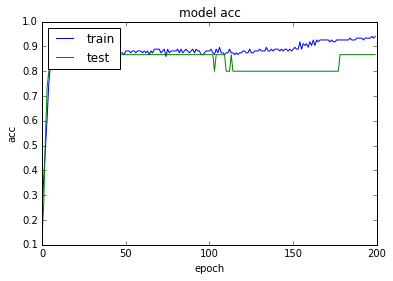

In [111]:
### now build our neural net and train it

model = Sequential() # Keras sequential neural net model
model.add(Dense(5, activation = 'tanh', input_dim = 4)) # build our first layer, 3 neurons, tanh (bipolar sigmoid) activation, input_dim = 2
model.add(Dense(3, activation = 'tanh')) # 3 outputs

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train_x,train_y, batch_size=5, epochs = 200, validation_data=(test_x, test_y))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
### now test  the neural net for classification accuracy

for i in range(len_test):
    pred = model.predict(np.reshape(test_x[i], (1,4)))
    print("Actual: " + str(test_y[i]) + " Prediction: " + str(pred) 
          + " Classified correctly? " + str(np.argmax(test_y[i]) == np.argmax(pred[0])) )

Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.50315499 -0.42358172 -0.63396311]] Classified correctly? True
Actual: [-0.5  0.5 -0.5] Prediction: [[-0.49845156  0.16237621 -0.15283543]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.49149743 -0.3056252  -0.69758385]] Classified correctly? True
Actual: [-0.5 -0.5  0.5] Prediction: [[-0.5207082  -0.23041001  0.28085068]] Classified correctly? True
Actual: [-0.5  0.5 -0.5] Prediction: [[-0.55377197  0.33507738 -0.33123758]] Classified correctly? True
Actual: [-0.5 -0.5  0.5] Prediction: [[-0.53491324  0.02827826 -0.00576998]] Classified correctly? False
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.53636867 -0.48021638 -0.61024207]] Classified correctly? True
Actual: [-0.5 -0.5  0.5] Prediction: [[-0.51446426 -0.32004011  0.38211   ]] Classified correctly? True
Actual: [-0.5  0.5 -0.5] Prediction: [[-0.42117193  0.09357104 -0.17731053]] Classified correctly? True
Actual: [ 0.5 -0.5 -0.5] Prediction: [[ 0.6004591 -0.5347628 -0